In [96]:
# Installing necessary packages for analysis
install.packages(c("tidyverse", "readr", "readxl", "xlsx", "ggplot2","dplyr"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [97]:
# Load the packages
library(tidyverse)
library(dplyr)
library(readr)
library(readxl)
library(xlsx)
library(ggplot2)

# **Data Exploration and Cleaning**

In [98]:
bikes_data <- read_csv("/kaggle/input/bikes-store-dataset/BikeStores.csv")
# View the first few rows of the dataset
head(bikes_data)

Rows: 4722 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): customers, city, state, order_date, product_name, category_name, br...
dbl (3): order_id, total_units, revenue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


order_id,customers,city,state,order_date,total_units,revenue,product_name,category_name,brand_name,store_name,sales_rep
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,2,1199.98,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland
1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,1,599.99,Electra Townie Original 7D EQ - Women's - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland
1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,2,3098.00,Surly Straggler - 2016,Cyclocross Bicycles,Surly,Santa Cruz Bikes,Mireya Copeland
1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,1,2899.99,Trek Fuel EX 8 29 - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland
1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,2,3599.98,Trek Remedy 29 Carbon Frameset - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland
2,Jaqueline Cummings,Huntington Station,NY,1/1/2016,2,1199.98,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,Electra,Baldwin Bikes,Marcelene Boyer


In [99]:
# Exploratory Data Analysis
# similar to info() method in python
str(bikes_data)

spc_tbl_ [4,722 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ order_id     : num [1:4722] 1 1 1 1 1 2 2 3 3 4 ...
 $ customers    : chr [1:4722] "Johnathan Velazquez" "Johnathan Velazquez" "Johnathan Velazquez" "Johnathan Velazquez" ...
 $ city         : chr [1:4722] "Pleasanton" "Pleasanton" "Pleasanton" "Pleasanton" ...
 $ state        : chr [1:4722] "CA" "CA" "CA" "CA" ...
 $ order_date   : chr [1:4722] "1/1/2016" "1/1/2016" "1/1/2016" "1/1/2016" ...
 $ total_units  : num [1:4722] 2 1 2 1 2 2 1 1 1 2 ...
 $ revenue      : num [1:4722] 1200 600 3098 2900 3600 ...
 $ product_name : chr [1:4722] "Electra Townie Original 7D EQ - 2016" "Electra Townie Original 7D EQ - Women's - 2016" "Surly Straggler - 2016" "Trek Fuel EX 8 29 - 2016" ...
 $ category_name: chr [1:4722] "Cruisers Bicycles" "Cruisers Bicycles" "Cyclocross Bicycles" "Mountain Bikes" ...
 $ brand_name   : chr [1:4722] "Electra" "Electra" "Surly" "Trek" ...
 $ store_name   : chr [1:4722] "Santa Cruz Bikes" "Santa Cruz Bike

In [100]:
# To know number of rows and columns in dataset
nrow(bikes_data)  
ncol(bikes_data)

[1] 4722

[1] 12

In [101]:
# Equivalent to df.describe() method in python
summary(bikes_data)

    order_id       customers             city              state          
 Min.   :   1.0   Length:4722        Length:4722        Length:4722       
 1st Qu.: 423.2   Class :character   Class :character   Class :character  
 Median : 828.5   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 821.3                                                           
 3rd Qu.:1226.0                                                           
 Max.   :1615.0                                                           
  order_date         total_units       revenue         product_name      
 Length:4722        Min.   :1.000   Min.   :   89.99   Length:4722       
 Class :character   1st Qu.:1.000   1st Qu.:  539.98   Class :character  
 Mode  :character   Median :1.000   Median :  939.98   Mode  :character  
                    Mean   :1.499   Mean   : 1816.81                     
                    3rd Qu.:2.000   3rd Qu.: 1999.98                     
                    Max.   :2.0

In [102]:
# Equivalent to df.columns 
colnames(bikes_data)

[1] "order_id"      "customers"     "city"          "state"        
 [5] "order_date"    "total_units"   "revenue"       "product_name" 
 [9] "category_name" "brand_name"    "store_name"    "sales_rep"

In [103]:
# checking for Nulls
# Counts of missing values for each column
colSums(is.na(bikes_data))

order_id     customers          city         state    order_date 
            0             0             0             0             0 
  total_units       revenue  product_name category_name    brand_name 
            0             0             0             0             0 
   store_name     sales_rep 
            0             0

In [104]:
# checking for duplicates
sum(duplicated(bikes_data))

[1] 0

In [105]:
# Checking data types in each column
sapply(bikes_data, class)

order_id     customers          city         state    order_date 
    "numeric"   "character"   "character"   "character"   "character" 
  total_units       revenue  product_name category_name    brand_name 
    "numeric"     "numeric"   "character"   "character"   "character" 
   store_name     sales_rep 
  "character"   "character"

In [106]:
# Similar to value_counts()
table(bikes_data$category_name)


  Children Bicycles    Comfort Bicycles   Cruisers Bicycles Cyclocross Bicycles 
                782                 537                1378                 256 
     Electric Bikes      Mountain Bikes          Road Bikes 
                212                1183                 374 

In [107]:
# Similar to value_counts()
table(bikes_data$city)


                Albany               Amarillo             Amityville 
                     6                     13                     34 
             Amsterdam                Anaheim           Apple Valley 
                    15                     35                     29 
               Astoria                Atwater                 Auburn 
                    32                     22                     10 
           Bakersfield                Baldwin          Baldwinsville 
                    12                     33                     37 
          Ballston Spa                Banning              Bay Shore 
                    52                     32                     31 
               Bayside               Bellmore               Bethpage 
                    20                     30                     20 
             Brentwood                  Bronx               Brooklyn 
                    28                     21                     26 
               Buff

In [108]:
install.packages("lubridate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [109]:
library(lubridate)

In [110]:
# creating a new column for order_date where it's data type is correct which is date.
bikes_data$new_date <- dmy(bikes_data$order_date)

In [111]:
str(bikes_data)

spc_tbl_ [4,722 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ order_id     : num [1:4722] 1 1 1 1 1 2 2 3 3 4 ...
 $ customers    : chr [1:4722] "Johnathan Velazquez" "Johnathan Velazquez" "Johnathan Velazquez" "Johnathan Velazquez" ...
 $ city         : chr [1:4722] "Pleasanton" "Pleasanton" "Pleasanton" "Pleasanton" ...
 $ state        : chr [1:4722] "CA" "CA" "CA" "CA" ...
 $ order_date   : chr [1:4722] "1/1/2016" "1/1/2016" "1/1/2016" "1/1/2016" ...
 $ total_units  : num [1:4722] 2 1 2 1 2 2 1 1 1 2 ...
 $ revenue      : num [1:4722] 1200 600 3098 2900 3600 ...
 $ product_name : chr [1:4722] "Electra Townie Original 7D EQ - 2016" "Electra Townie Original 7D EQ - Women's - 2016" "Surly Straggler - 2016" "Trek Fuel EX 8 29 - 2016" ...
 $ category_name: chr [1:4722] "Cruisers Bicycles" "Cruisers Bicycles" "Cyclocross Bicycles" "Mountain Bikes" ...
 $ brand_name   : chr [1:4722] "Electra" "Electra" "Surly" "Trek" ...
 $ store_name   : chr [1:4722] "Santa Cruz Bikes" "Santa Cruz Bike

In [112]:
# Checking data types in each column again to check the new column and it's data type
sapply(bikes_data, class)

order_id     customers          city         state    order_date 
    "numeric"   "character"   "character"   "character"   "character" 
  total_units       revenue  product_name category_name    brand_name 
    "numeric"     "numeric"   "character"   "character"   "character" 
   store_name     sales_rep      new_date 
  "character"   "character"        "Date"

In [113]:
head(bikes_data)

order_id,customers,city,state,order_date,total_units,revenue,product_name,category_name,brand_name,store_name,sales_rep,new_date
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>
1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,2,1199.98,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland,2016-01-01
1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,1,599.99,Electra Townie Original 7D EQ - Women's - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland,2016-01-01
1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,2,3098.00,Surly Straggler - 2016,Cyclocross Bicycles,Surly,Santa Cruz Bikes,Mireya Copeland,2016-01-01
1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,1,2899.99,Trek Fuel EX 8 29 - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland,2016-01-01
1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,2,3599.98,Trek Remedy 29 Carbon Frameset - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland,2016-01-01
2,Jaqueline Cummings,Huntington Station,NY,1/1/2016,2,1199.98,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,Electra,Baldwin Bikes,Marcelene Boyer,2016-01-01


In [114]:
# Extracting month , day , year from the new_date column to use in visualization further on
bikes_data$day <- day(bikes_data$new_date)
bikes_data$month <- month(bikes_data$new_date, label = TRUE, abbr = FALSE)  # Convert month to full names (January-December)
bikes_data$year <- year(bikes_data$new_date)

In [115]:
# for viewing changes
head(bikes_data)

order_id,customers,city,state,order_date,total_units,revenue,product_name,category_name,brand_name,store_name,sales_rep,new_date,day,month,year
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<int>,<ord>,<dbl>
1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,2,1199.98,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland,2016-01-01,1,January,2016
1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,1,599.99,Electra Townie Original 7D EQ - Women's - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland,2016-01-01,1,January,2016
1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,2,3098.00,Surly Straggler - 2016,Cyclocross Bicycles,Surly,Santa Cruz Bikes,Mireya Copeland,2016-01-01,1,January,2016
1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,1,2899.99,Trek Fuel EX 8 29 - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland,2016-01-01,1,January,2016
1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,2,3599.98,Trek Remedy 29 Carbon Frameset - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland,2016-01-01,1,January,2016
2,Jaqueline Cummings,Huntington Station,NY,1/1/2016,2,1199.98,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,Electra,Baldwin Bikes,Marcelene Boyer,2016-01-01,1,January,2016


In [116]:
# similar to unique() method in python
unique(bikes_data$state)

[1] "CA" "NY" "TX"

In [117]:
# to write state full name instead of abbreviations
state_mapping <- c(
  'CA' = 'California',
  'NY' = 'New York',
  'TX' = 'Texas'
)

In [118]:
bikes_data$state <- state_mapping[bikes_data$state]
table(bikes_data$state)


California   New York      Texas 
      1006       3195        521 

In [119]:
table(bikes_data$sales_rep)


  Genna Serrano     Kali Vargas   Layla Terrell Marcelene Boyer Mireya Copeland 
            544             269             252            1615             462 
  Venita Daniel 
           1580 

In [120]:
names(bikes_data)[names(bikes_data) == "sales_rep"] <- "sales_representative"

In [121]:
# viewing changes
head(bikes_data)

order_id,customers,city,state,order_date,total_units,revenue,product_name,category_name,brand_name,store_name,sales_representative,new_date,day,month,year
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<int>,<ord>,<dbl>
1,Johnathan Velazquez,Pleasanton,California,1/1/2016,2,1199.98,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland,2016-01-01,1,January,2016
1,Johnathan Velazquez,Pleasanton,California,1/1/2016,1,599.99,Electra Townie Original 7D EQ - Women's - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland,2016-01-01,1,January,2016
1,Johnathan Velazquez,Pleasanton,California,1/1/2016,2,3098.00,Surly Straggler - 2016,Cyclocross Bicycles,Surly,Santa Cruz Bikes,Mireya Copeland,2016-01-01,1,January,2016
1,Johnathan Velazquez,Pleasanton,California,1/1/2016,1,2899.99,Trek Fuel EX 8 29 - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland,2016-01-01,1,January,2016
1,Johnathan Velazquez,Pleasanton,California,1/1/2016,2,3599.98,Trek Remedy 29 Carbon Frameset - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland,2016-01-01,1,January,2016
2,Jaqueline Cummings,Huntington Station,New York,1/1/2016,2,1199.98,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,Electra,Baldwin Bikes,Marcelene Boyer,2016-01-01,1,January,2016


# Data Visualization

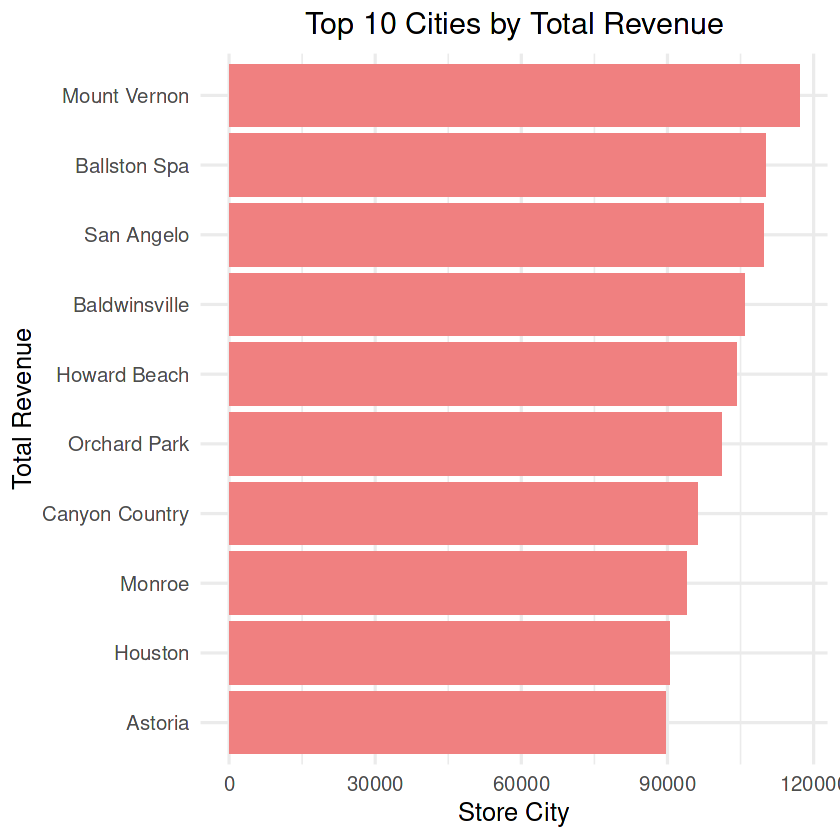

In [122]:
# What are the Top 10 Cities that have Highest Revenue?
# Summing the revenue by city, sorting, and selecting the top 10
rev_by_city <- bikes_data %>%
  group_by(city) %>%
  summarise(total_revenue = sum(revenue)) %>%
  arrange(desc(total_revenue)) %>%
  head(10)

# Plotting the horizontal bar chart
ggplot(rev_by_city, aes(x = reorder(city, total_revenue), y = total_revenue)) +
  geom_bar(stat = "identity", fill = "lightcoral") +
  coord_flip() +
  labs(title = "Top 10 Cities by Total Revenue", x = "Total Revenue", y = "Store City") +
  theme_minimal(base_size = 15) +
  theme(plot.title = element_text(hjust = 0.5))

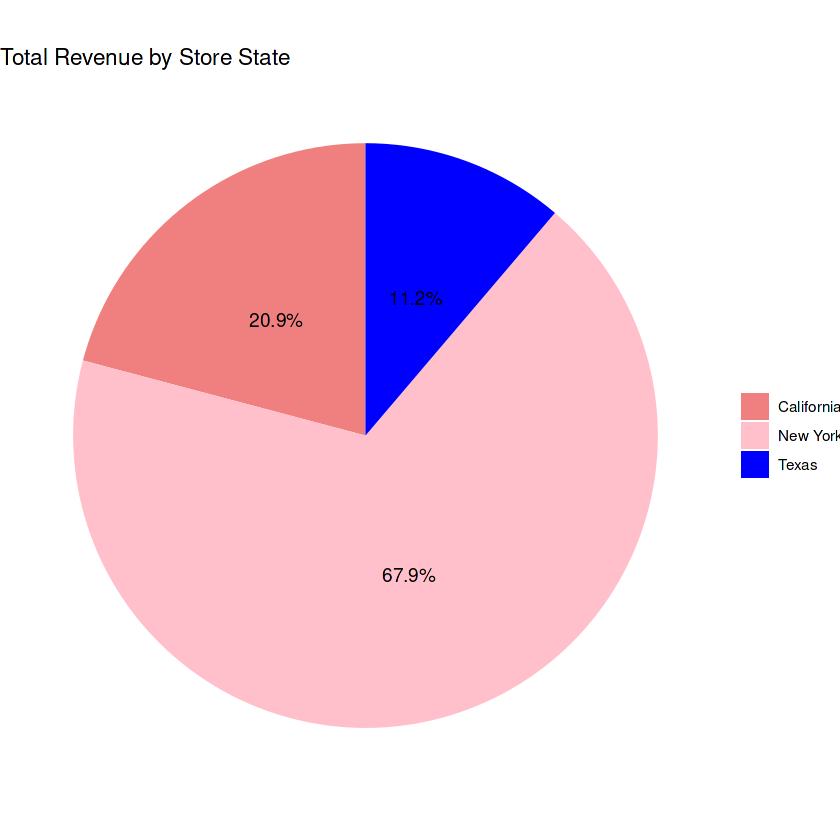

In [123]:
# What are the Percentages of Store States regarding Revenue?
# Summarize revenue by state
rev_by_state <- bikes_data %>%
  group_by(state) %>%
  summarize(revenue = sum(revenue))

# Create pie chart
ggplot(rev_by_state, aes(x = "", y = revenue, fill = state)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  scale_fill_manual(values = c("lightcoral", "pink", "blue")) +
  geom_text(aes(label = scales::percent(revenue / sum(revenue))), 
            position = position_stack(vjust = 0.5)) +
  ggtitle("Total Revenue by Store State") +
  theme_void() +
  theme(legend.title = element_blank())

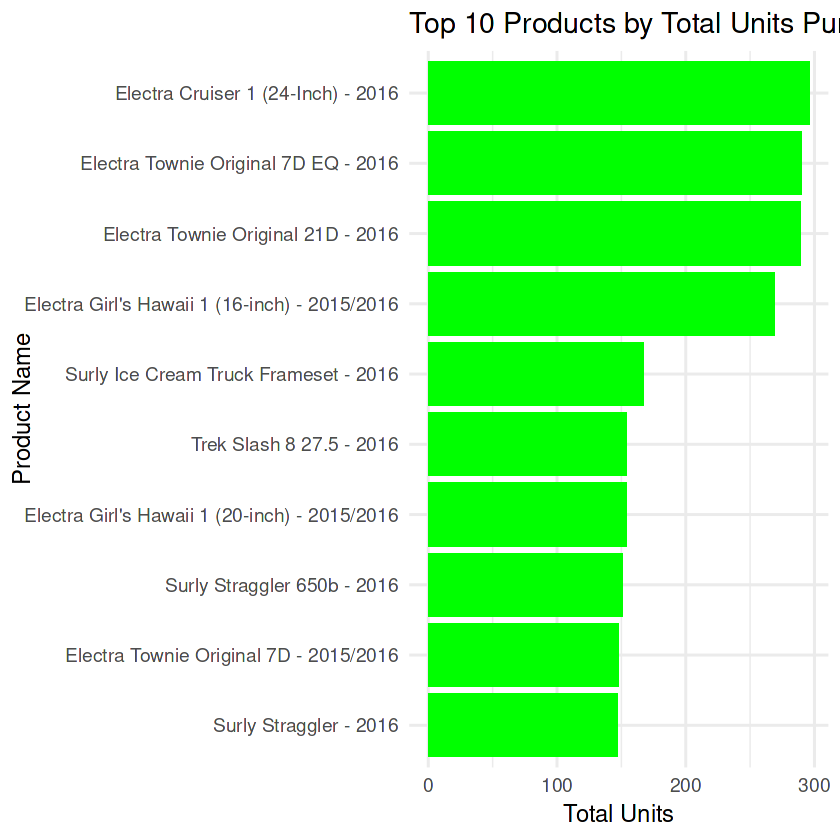

In [124]:
# What are the most popular products in terms of units purchased?
# Summarize total units by product and get top 10
prod_by_units <- bikes_data %>%
  group_by(product_name) %>%
  summarize(total_units = sum(total_units)) %>%
  arrange(desc(total_units)) %>%
  head(10)

# Create a horizontal bar chart
ggplot(prod_by_units, aes(x = reorder(product_name, total_units), y = total_units)) +
  geom_bar(stat = "identity", fill = "green") +
  coord_flip() +  
  ggtitle("Top 10 Products by Total Units Purchased") +
  xlab("Product Name") +
  ylab("Total Units") +
  theme_minimal(base_size = 14)

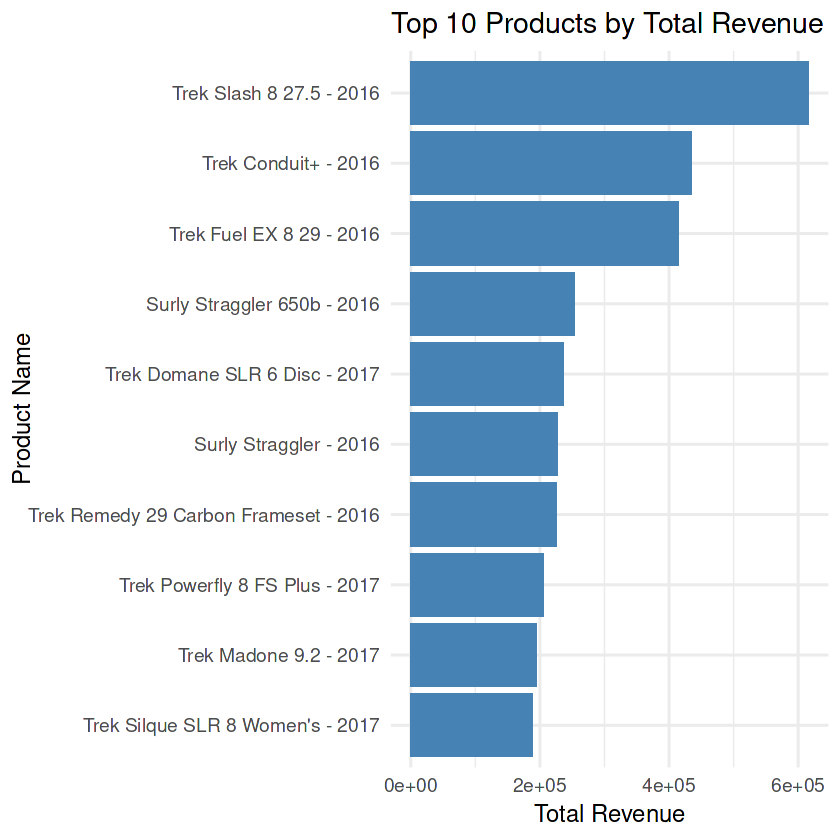

In [125]:
# What are the Top 10 popular products in terms of revenue?
# Summarize revenue by product and get top 10
prod_by_revenue <- bikes_data %>%
  group_by(product_name) %>%
  summarize(revenue = sum(revenue)) %>%
  arrange(desc(revenue)) %>%
  head(10)

# Create the horizontal bar chart
ggplot(prod_by_revenue, aes(x = reorder(product_name, revenue), y = revenue)) +
  geom_bar(stat = "identity", fill = "steelblue") +  # Use a default blue color
  coord_flip() +  # Flip axes for horizontal bars
  ggtitle("Top 10 Products by Total Revenue") +
  xlab("Product Name") +
  ylab("Total Revenue") +
  theme_minimal(base_size = 14)

In [126]:
# What is the Top popular product in terms of revenue generated each year?
# Summarize total revenue by product for each year
revenue_by_product <- bikes_data %>%
  group_by(year, product_name) %>%
  summarize(revenue = sum(revenue)) %>%
  ungroup()

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


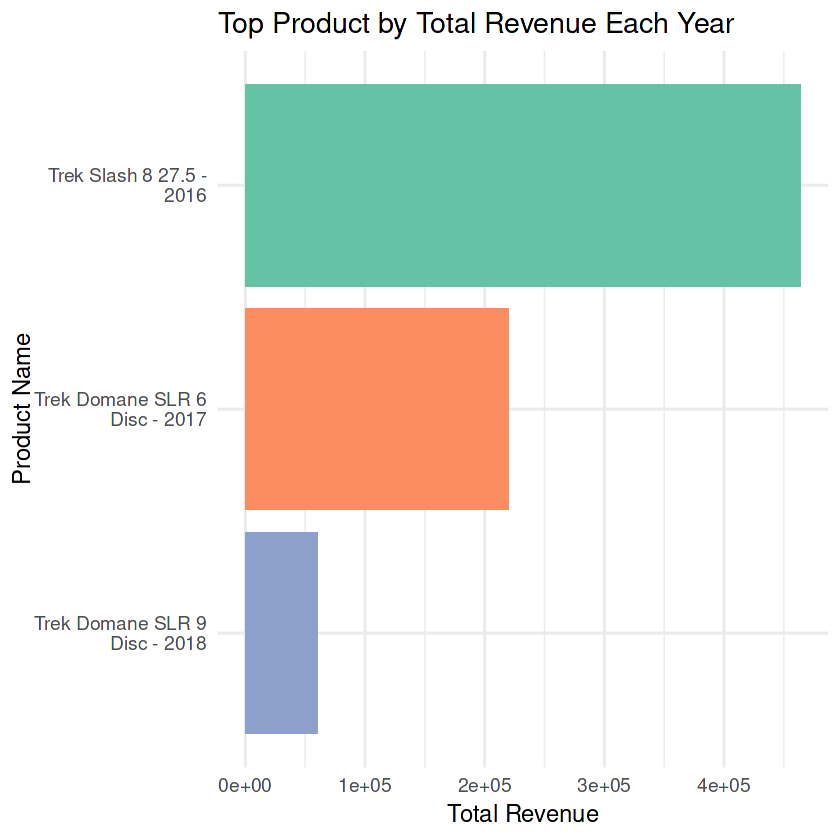

In [127]:
# Find the top product by total revenue for each year
top_products <- revenue_by_product %>%
  group_by(year) %>%
  slice_max(revenue, n = 1) %>%
  ungroup()

# Create the horizontal bar chart
ggplot(top_products, aes(x = reorder(product_name, revenue), y = revenue, fill = factor(year))) +
  geom_bar(stat = "identity") +
  coord_flip() +  
  ggtitle("Top Product by Total Revenue Each Year") +
  xlab("Product Name") +
  ylab("Total Revenue") +
  scale_fill_brewer(palette = "Set2") + 
  theme_minimal(base_size = 14) +
  theme(legend.position = "none") +  
  scale_x_discrete(labels = function(x) str_wrap(x, width = 20))  

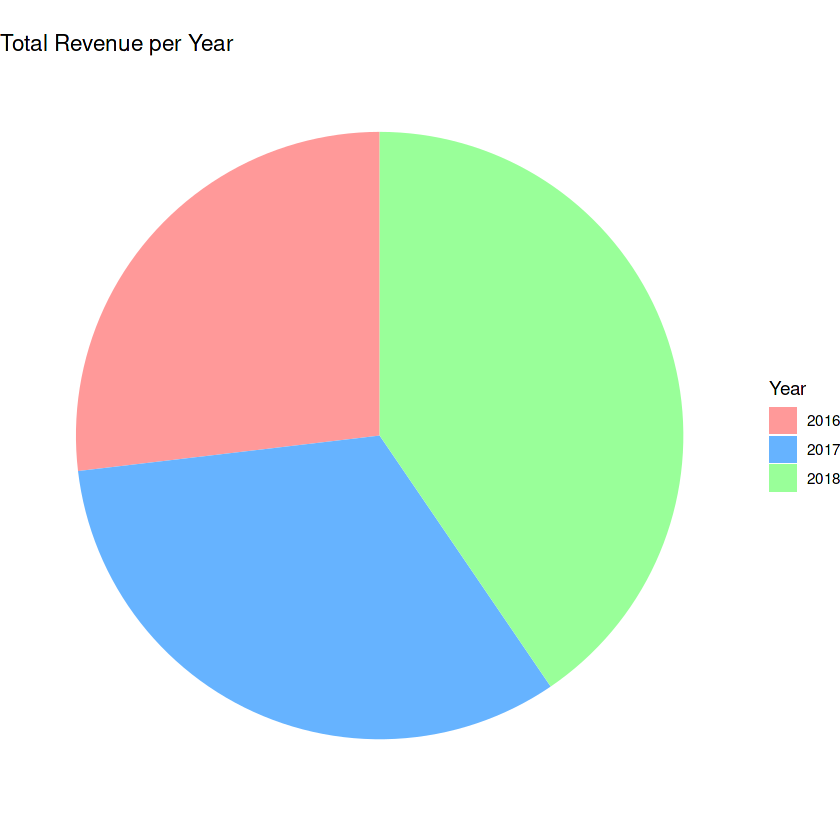

In [128]:
# What is the Distribution of Revenue generated each year?
# Calculate average total revenue for each year
avg_rev_by_year <- bikes_data %>%
  group_by(year) %>%
  summarize(revenue = mean(revenue))

# Create a pie chart using ggplot2
ggplot(avg_rev_by_year, aes(x = "", y = revenue, fill = as.factor(year))) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(title = "Total Revenue per Year", x = NULL, y = NULL) +
  theme_void() +  
  scale_fill_manual(values = c('#ff9999', '#66b3ff', '#99ff99', '#ffcc99'), 
                    name = "Year") +  
  theme(legend.position = "right")  

In [129]:
# Who are the Top Customers contributed to Highest Revenue each year?
# Summarize total revenue by customer for each year
revenue_by_customer <- bikes_data %>%
  group_by(year, customers) %>%
  summarize(revenue = sum(revenue)) %>%
  ungroup()

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


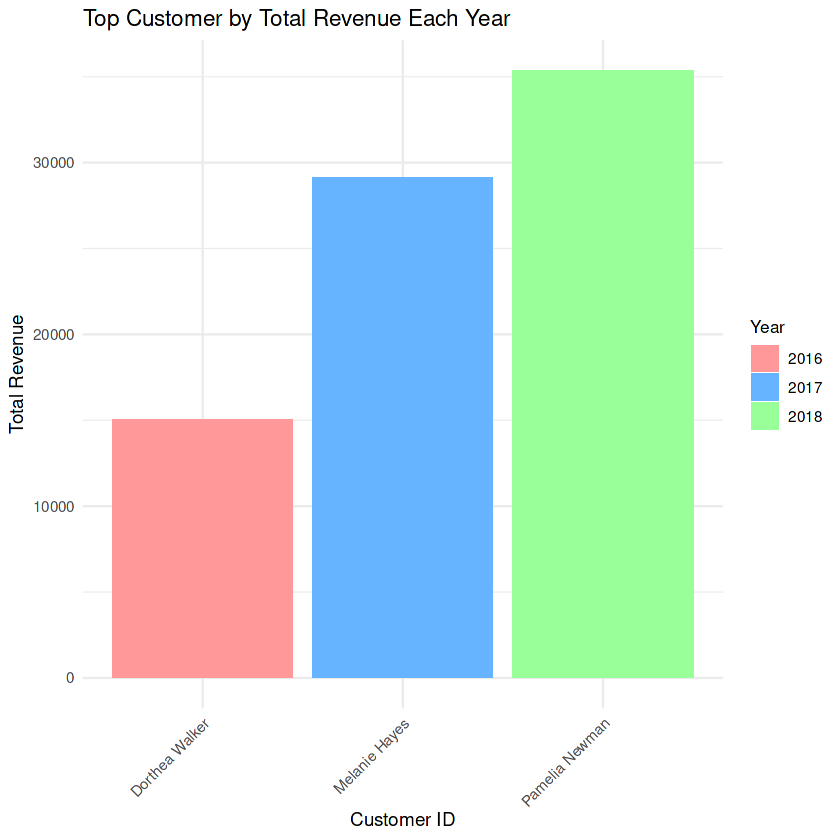

In [130]:
# Identify top customer for each year
top_customers <- revenue_by_customer %>%
  group_by(year) %>%
  slice(which.max(revenue)) %>%
  ungroup()

# Create a bar plot
ggplot(top_customers, aes(x = customers, y = revenue, fill = as.factor(year))) +
  geom_bar(stat = "identity", position = position_dodge()) +  
  labs(title = "Top Customer by Total Revenue Each Year", x = "Customer ID", y = "Total Revenue") +
  theme_minimal() +  
  scale_fill_manual(values = c('#ff9999', '#66b3ff', '#99ff99', '#ffcc99'), 
                    name = "Year") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.title = element_text(size = 10))  

In [131]:
# What are the months that have the maximum revenue?
# Summarize total revenue by month
revenue_by_month <- bikes_data %>%
  group_by(month) %>%
  summarize(revenue = sum(revenue)) %>%
  arrange(desc(revenue))

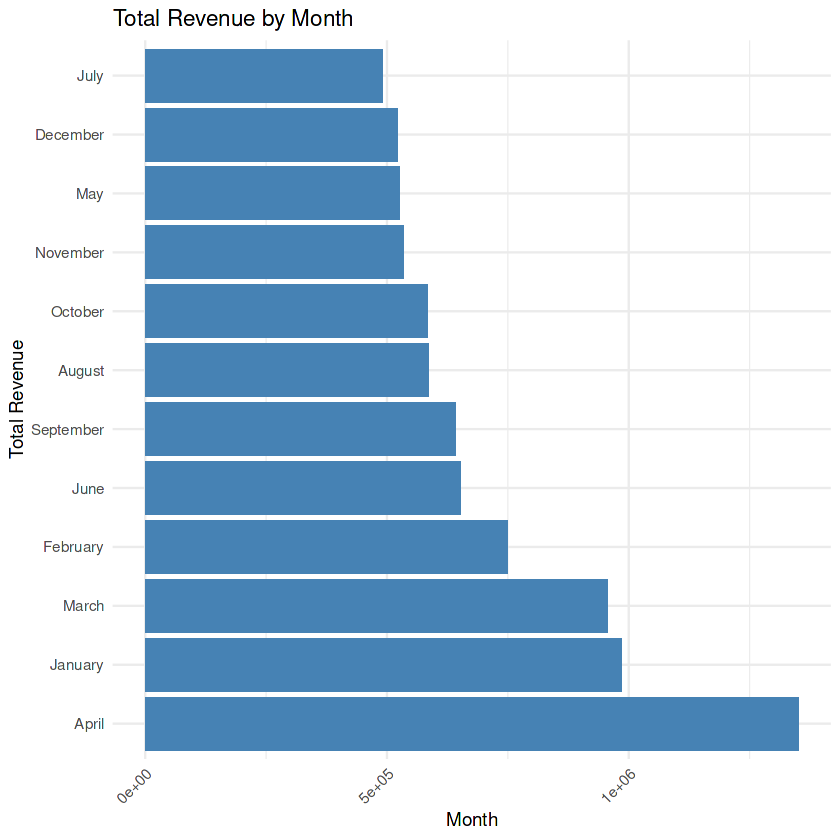

In [132]:
# Create a horizontal bar plot
ggplot(revenue_by_month, aes(x = reorder(month, -revenue), y = revenue)) +
  geom_bar(stat = "identity", fill = "steelblue") +  
  coord_flip() +  
  labs(title = "Total Revenue by Month", x = "Total Revenue", y = "Month") +
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  

In [133]:
# Which sales representatives and stores are top performers?
# Calculate the average revenue by sales representative
sales_rep_by_rev <- bikes_data %>%
  group_by(sales_representative) %>%
  summarize(revenue = mean(revenue)) %>%
  arrange(desc(revenue))  

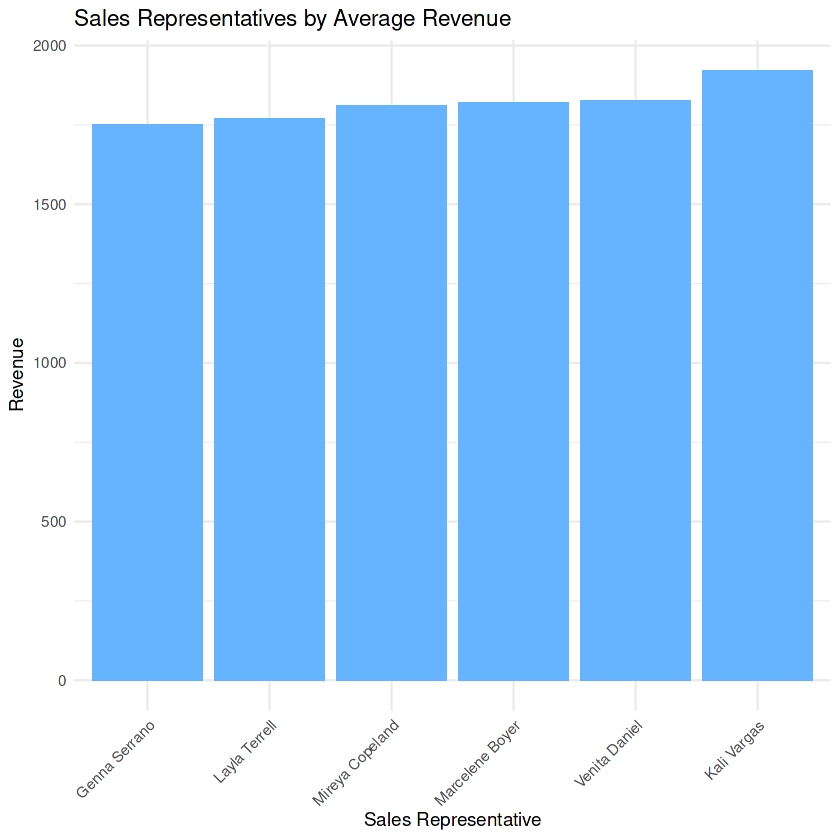

In [134]:
# Create a bar plot
ggplot(sales_rep_by_rev, aes(x = reorder(sales_representative, revenue), y = revenue)) +
  geom_bar(stat = "identity", fill = "#66b3ff") +  
  labs(title = "Sales Representatives by Average Revenue",
       x = "Sales Representative",
       y = "Revenue") +
  theme_minimal() +  
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  

In [135]:
# what is the total Revenue generated by each store ?
# Calculate total revenue by store
revenue_by_store <- bikes_data %>%
  group_by(store_name) %>%
  summarize(revenue = sum(revenue)) %>%
  arrange(desc(revenue))  

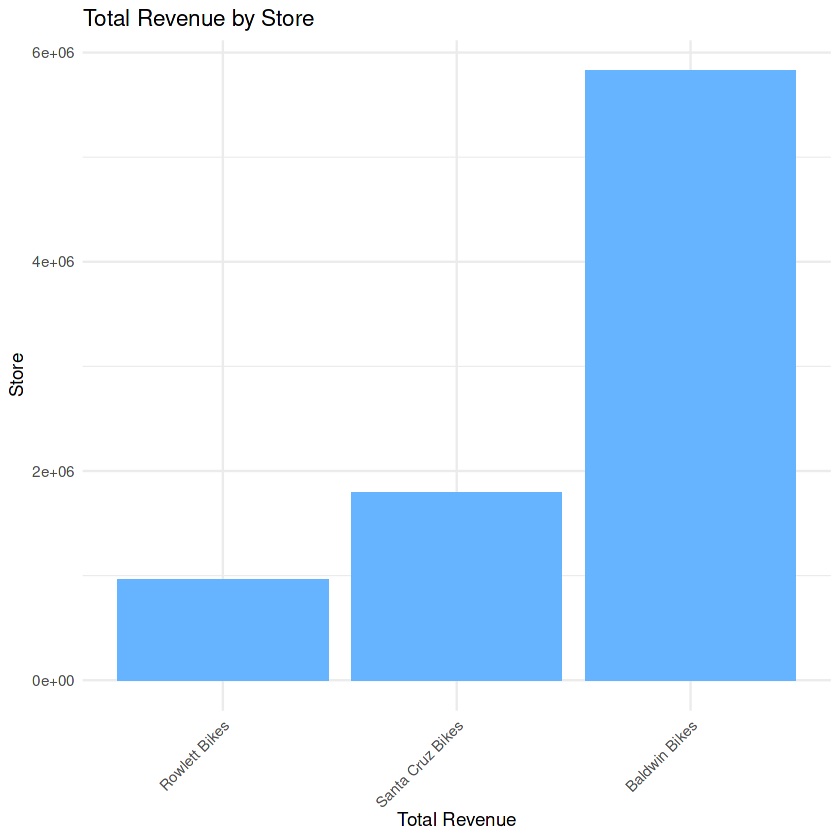

In [136]:
# Create a horizontal bar plot
ggplot(revenue_by_store, aes(x = reorder(store_name, revenue), y = revenue)) +
  geom_bar(stat = "identity", fill = "#66b3ff") + 
  labs(title = "Total Revenue by Store",
       x = "Total Revenue",
       y = "Store") +
  theme_minimal() +  
  theme(axis.text.y = element_text(angle = 0, hjust = 1),  
        axis.text.x = element_text(angle = 45, hjust = 1))  

In [137]:
# What seasonal trends can be observed in the sales data?
# Calculate total revenue by year
total_revenue_by_year <- bikes_data %>%
  group_by(year) %>%
  summarize(revenue = sum(revenue)) %>%
  ungroup() 


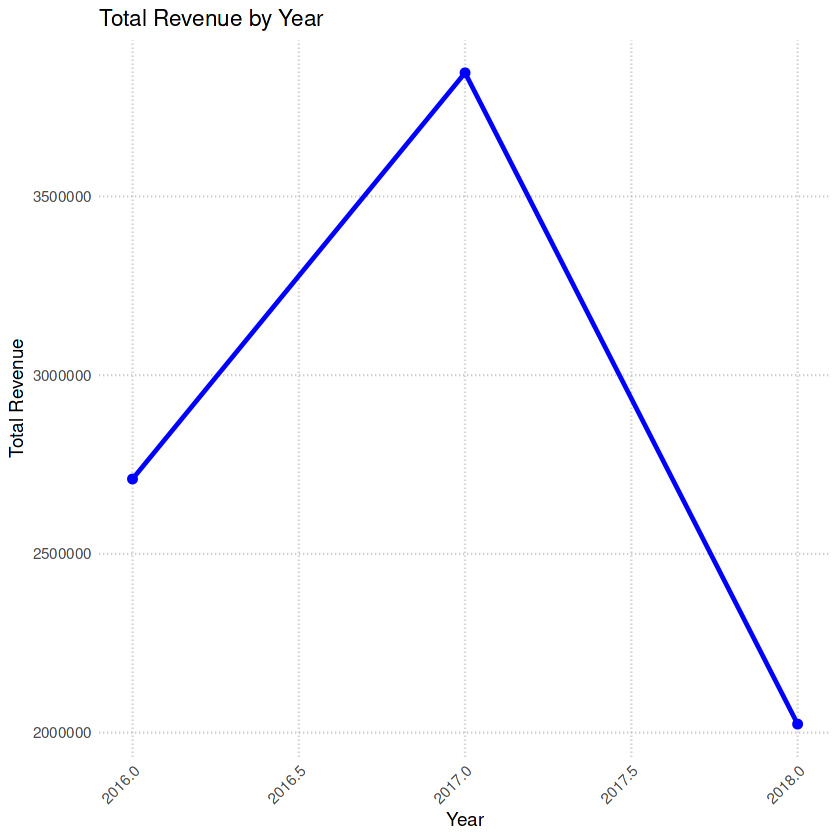

In [138]:
# Create a line plot
ggplot(total_revenue_by_year, aes(x = year, y = revenue)) +
  geom_line(color = "blue", size = 1) +  
  geom_point(color = "blue", size = 2) +  
  labs(title = "Total Revenue by Year",
       x = "Year",
       y = "Total Revenue") +
  theme_minimal() +  
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  
  theme(panel.grid.major = element_line(color = "grey", linetype = "dotted"), 
        panel.grid.minor = element_blank())  

In [139]:
# What is the total revenue by month and year?
# Summarize total revenue by Year and Month
total_revenue_by_year_month <- bikes_data %>%
  group_by(year, month) %>%
  summarize(revenue = sum(revenue)) %>%
  ungroup()  

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


In [140]:
# Convert 'Month' to a factor with the correct order
total_revenue_by_year_month$month <- factor(total_revenue_by_year_month$month, 
                                            levels = c("January", "February", "March", "April", 
                                                       "May", "June", "July", "August", "September", 
                                                       "October", "November", "December"), 
                                            ordered = TRUE)

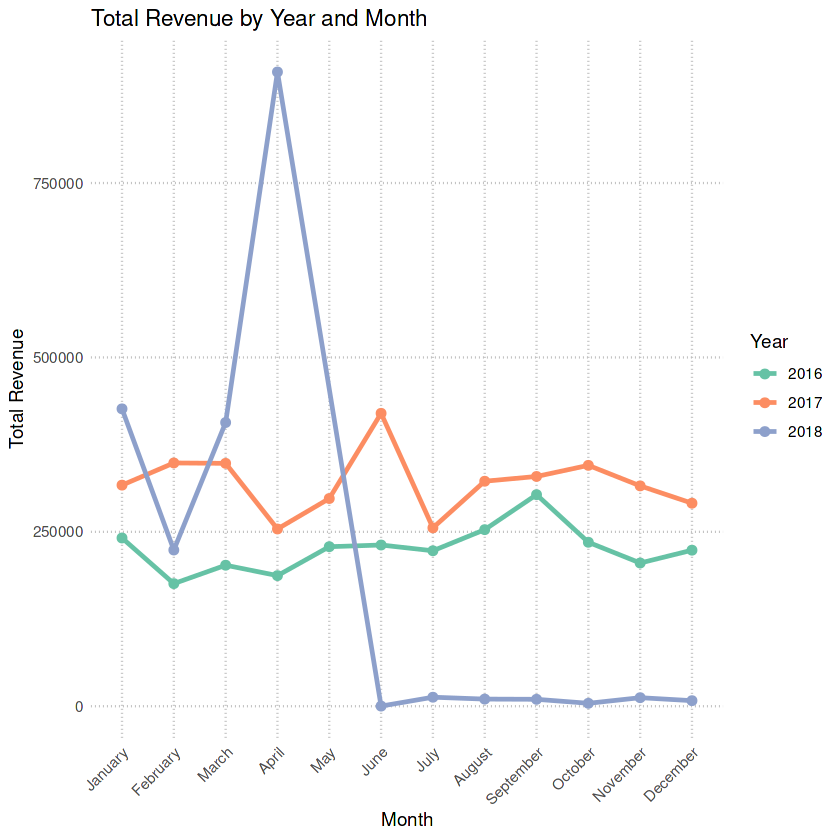

In [141]:
# Sort by 'Year' and 'Month'
total_revenue_by_year_month <- total_revenue_by_year_month %>%
  arrange(year, month)

# Create line plot
ggplot(total_revenue_by_year_month, aes(x = month, y = revenue, group = year, color = as.factor(year))) +
  geom_line(size = 1) + 
  geom_point(size = 2) + 
  labs(title = "Total Revenue by Year and Month",
       x = "Month",
       y = "Total Revenue") +
  theme_minimal() +  
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
  scale_color_brewer(palette = "Set2", name = "Year") + 
  theme(panel.grid.major = element_line(color = "grey", linetype = "dotted"), 
        panel.grid.minor = element_blank()) 